<a href="https://colab.research.google.com/github/abderrazzaq-laanoui/PFE-HexaCoders/blob/main/ml_ocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align:center"><h1>RECONNAISSANCE DE L'ÉCRITURE MANUSCRITE DE LESTTRES TIFINAGH </h1></div>

---

# dépendances

#### Liaison avec Google Drive

In [4]:
# liaison avec  Google Drive comme source de donnees 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### importations

In [5]:
# Importation des bibliothèques
import os
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import random
import pickle
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow import keras

#### Variables

In [9]:

CATEGORIES = ["ya", "yab", "yach", "yad", "yadd", "yae", "yaf", "yag", "yagh", 
              "yagw", "yah", "yahh", "yaj", "yak", "yakw", "yal", "yam", "yan", 
              "yaq", "yar","yarr", "yas", "yass", "yat", "yatt", "yaw", "yax", 
              "yay", "yaz", "yazz", "yey", "yi", "yu"] # a list of all possible classes
T_CATEGORIES = ['ⴰ', 'ⴱ', 'ⵛ', 'ⴷ', 'ⴹ', 'ⵄ', 'ⴼ', 'ⴳ', 'ⵖ', 'ⴳⵯ', 'ⵀ', 'ⵃ', 'ⵊ', 'ⴽ', 'ⴽⵯ',
                'ⵍ','ⵎ','ⵏ', 'ⵇ', 'ⵔ', 'ⵕ', 'ⵙ', 'ⵚ', 'ⵜ', 'ⵟ', 'ⵡ', 'ⵅ', 'ⵢ', 'ⵣ','ⵥ', 'ⴻ', 'ⵉ', 'ⵓ']

training_data = [] # cette liste qui contiendra les données d'entraînement traitées
testing_data = [] # cette liste qui contiendra les données de test traitées


# CHARGEMENT DU DATASET

In [10]:

#@markdown \
#@markdown #### Entrez le chemin d'accès au répertoire DATASET dans votre Drive:
chemin = "" #@param {type:"string"}
#@markdown \

if chemin == "":
    chemin = "genie info/Rapport PFE - HexaCoders/DATASET" #default path
# Declaration des Variables
DIR = os.path.join("/content/drive/MyDrive",chemin) # h the path to the DATASET dir  in your drive
TRAIN_DATA_DIR = os.path.join(DIR,"training_data/")
TEST_DATA_DIR = os.path.join(DIR,"testing_data/")
MODEL_DIR = os.path.join(DIR,"model/")
TRAIN_MODEL_DIR = os.path.join(DIR,"model/train/")
TEST_MODEL_DIR = os.path.join(DIR,"model/test/")



## DONNÉES D'ENTRAÎNEMENT


#### Préparation des données

<b>OpenCV</b> (référencé par cv) est une bibliothèque multi-plateforme qui nous permet de développer des applications de vision par ordinateur en temps réel. Elle se concentre principalement sur le traitement des images en temps réel., la capture et l'analyse vidéo, y compris des fonctionnalités telles que la détection des visages et des objets.

In [ ]:
training_data = [] # la liste qui contiendra les données d'entraînement traitées
def prepare_training_data():
    for category in CATEGORIES :
        path = os.path.join(TRAIN_DATA_DIR, category)
        class_num = CATEGORIES.index(category)  # obtention du classement (0 à 32)
        for img in os.listdir(path): # itérer sur chaque image dans un dossier de caractères
            img_array = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE) # read graysacled images
            new_array = cv.resize(img_array, (50,50)) # redimensionnement des images
            training_data.append([new_array, class_num]) # append processed image to the training data list

prepare_training_data() # calling the fct

In [ ]:
testing_data = [] # a list that will contain processed testing data
def prepare_testing_data():
    for category in CATEGORIES :
        path = os.path.join(TEST_DATA_DIR, category)
        class_num = CATEGORIES.index(category)  # get the classification  (0 to 32)
        for img in os.listdir(path): # iterate over each image in a caracter folder 
            img_array = cv.imread(os.path.join(path, img), cv.IMREAD_GRAYSCALE) # read graysacled images
            new_array = cv.resize(img_array, (50,50)) # resizing images
            testing_data.append([new_array, class_num]) # append processed image to the testing data list

prepare_testing_data() # calling the fct

Nous voulons mélanger les données. Pour l'instant, nos données sont sous forme de : "ya,"yab", puis "yach" ... . Cela finit généralement par causer des problèmes, car, au début, le classificateur apprendra à prédire toujours "ya". Ensuite, il passera à prédire "yab" ...

In [ ]:
# shuffle the  data randomly 
# random.shuffle(training_data)
random.shuffle(testing_data)


#### Création du modèle

In [5]:
# Créer le modèle
x_train = [] 
y_train = []

for features,label in training_data:
    x_train.append(features)
    y_train.append(label)

x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
# Créer le modèle
x_test = [] 
y_test = []

for features,label in testing_data:
    x_test.append(features)
    y_test.append(label)

x_test = np.array(x_test)
y_test = np.array(y_test)


#### Sauvegarde du modèle

Le module <b> pickle </b> met en œuvre des protocoles binaires pour sérialiser et désérialiser une structure d'objet Python. <br><br> Le "pickling" est le processus par lequel une hiérarchie d'objets Python est convertie en un flux d'octets.

In [ ]:

# Sauvegarder le modèle

pickle_out = open(TRAIN_MODEL_DIR + "x_train.pickle","wb")
pickle.dump(x_train, pickle_out)
pickle_out.close()

pickle_out = open(TRAIN_MODEL_DIR + "y_train.pickle","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [ ]:
# Sauvegarder le modèle

pickle_out = open(TEST_MODEL_DIR + "x_test.pickle","wb")
pickle.dump(x_test, pickle_out)
pickle_out.close()

pickle_out = open(TEST_MODEL_DIR + "y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()


#### Téléchargement du modèle

Le "unpickling" est l'opération inverse, par laquelle un flux d'octets (provenant d'un fichier binaire ou d'un objet de type octet) est reconverti en une hiérarchie d'objets.

In [11]:
# to load the model we use the script
pickle_in = open(TRAIN_MODEL_DIR + "x_train.pickle","rb")
x_train = pickle.load(pickle_in)

pickle_in = open(TRAIN_MODEL_DIR + "y_train.pickle","rb")
y_train = pickle.load(pickle_in)

In [12]:
# to load the model we use the script
pickle_in = open(TEST_MODEL_DIR + "x_test.pickle","rb")
x_test = pickle.load(pickle_in)

pickle_in = open(TEST_MODEL_DIR + "y_test.pickle","rb")
y_test = pickle.load(pickle_in)

# CRÉER LE RÉSEAU NURAL CONVOLUTIONNEL

#### Helper-function for plotting images


#### Dimensions de Donnees pour plus de commodité

In [13]:
# The number of pixels in each dimension of an image.
img_size = 50

# The images are stored in one-dimensional arrays of this length.
img_size_flat = 50*50

# Tuple with height and width of images used to reshape arrays.
img_shape = (50, 50)

# Number of classes, one class for each of 33 alphabet.
num_classes = 33

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1


#### Structuration des entrées

In [14]:
# to reduce the computition we convert the numbers from float64 => float32
# we normalise (deviding all by 255.0) to make numbers between 0 => 1 instead of 0 => 255
x_train = x_train.reshape(-1,50,50,1).astype("float32") / 255.0 
x_test = x_test.reshape(-1,50,50,1).astype("float32") / 255.0

y_train = keras.utils.to_categorical(y_train, 33)
y_test = keras.utils.to_categorical(y_test, 33)


#### CREATE THE VGG16 MODEL

In [15]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

def VGG16(width, height, depth, classes):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1
		# CONV => RELU => POOL layer set
		model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		#model.add(Dropout(0.25))

		# (CONV => RELU) * 2 => POOL layer set
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.40))

		# (CONV => RELU) * 3 => POOL layer set
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.40))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(512))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [16]:
model = VGG16(width=50, height=50, depth=1, classes=33)

#### Specification des parametres de training

In [17]:
# and batch size
INIT_LR = 0.001 #  the learning rate is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function
EPOCHS = 15 # 
BS = 16 # the number of training examples utilized in one iteration


 Defining the loss function, the optimizer and the metrics.

In [18]:
print("[INFO] training network...")
opt = keras.optimizers.Adam(lr= INIT_LR, decay= INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


#### Model infos

In [14]:
print("Model info... \n ")
print(model.summary())

Model info... 
 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 50, 50, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 50, 50, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 25,

In [19]:
# train the network + monitor
H = model.fit(x=x_train, y=y_train, batch_size=BS,
              validation_data=(x_test, y_test), 
              steps_per_epoch= len(y_train) // BS, epochs=EPOCHS)
print("[INFO] training Done...")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/15
1650/1650 [==============================] - 74s 36ms/step - loss: 0.8844 - accuracy: 0.7665 - val_loss: 0.3231 - val_accuracy: 0.8945
Epoch 2/15
1650/1650 [==============================] - 59s 36ms/step - loss: 0.1056 - accuracy: 0.9694 - val_loss: 0.1057 - val_accuracy: 0.9697
Epoch 3/15
1650/1650 [==============================] - 59s 36ms/step - loss: 0.0767 - accuracy: 0.9774 - val_loss: 0.4342 - val_accuracy: 0.8758
Epoch 4/15
1650/1650 [==============================] - 58s 35ms/step - loss: 0.0684 - accuracy: 0.9802 - val_loss: 0.1204 - val_accuracy: 0.9652
Epoch 5/15
1650/1650 [==============================] - 58s 35ms/step - loss: 0.0415 - accuracy: 0.9874 - val_loss: 0.0641 - val_accuracy: 0.9806
Epoch 6/15
1650/1650 [==============================] - 58s 35ms/step - loss: 0.0369 - accuracy: 0.9885 - val_loss: 0.1010 - val_accuracy: 0.9700
Epoch 7/15
1650/1650 [==============================] - 59s 36ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.0339 -

#### Saving the trained model

In [20]:
model.save(os.path.join(MODEL_DIR,"VGG16-4.model"))

INFO:tensorflow:Assets written to: /content/drive/MyDrive/genie info/Rapport PFE - HexaCoders/DATASET/model/VGG16-4.model/assets


In [21]:
pip install tensorflowjs

     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 112kB 13.5MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


#### Export the model for tonserflowjs

In [22]:
model.save('model4.h5')

!mkdir model4
!tensorflowjs_converter --input_format keras model4.h5 model/
!zip -r model4.zip model 

from google.colab import files
files.download('model4.zip')

2021-04-05 13:00:30.462766: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
  adding: model/ (stored 0%)
  adding: model/group1-shard3of3.bin (deflated 7%)
  adding: model/group1-shard1of3.bin (deflated 7%)
  adding: model/group1-shard2of3.bin (deflated 7%)
  adding: model/model.json (deflated 90%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Load the trained model

In [ ]:
model = keras.models.load_model(os.path.join(MODEL_DIR,"VGG16-4.model"))

## Statistics

#### Model Accuracy

In [23]:
scores = model.evaluate (x_test, y_test, verbose=0)
print("Accuracy = "+str(scores[1]*100)+" \n")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Accuracy = 99.78787899017334 



Evolution of Loss and Accuracy by epoches

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

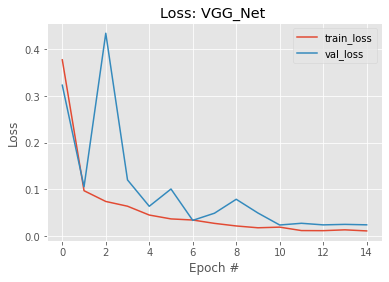

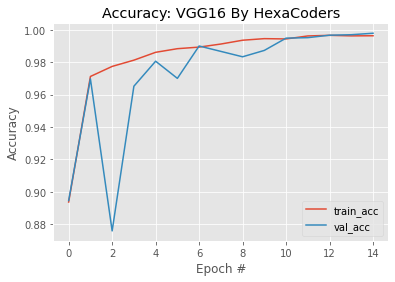

In [24]:
# plot the training loss 
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Loss: VGG_Net ")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.savefig("Loss_plot_256.png")
files.download("Loss_plot_256.png")

# plot the training accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["accuracy"], label="train_acc") 
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy: VGG16 By HexaCoders")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("Accuracy_plot_256.png")
files.download("Accuracy_plot_256.png")

#### Confusion Matrix

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ploting Conf_Mat..................


<Figure size 432x288 with 0 Axes>

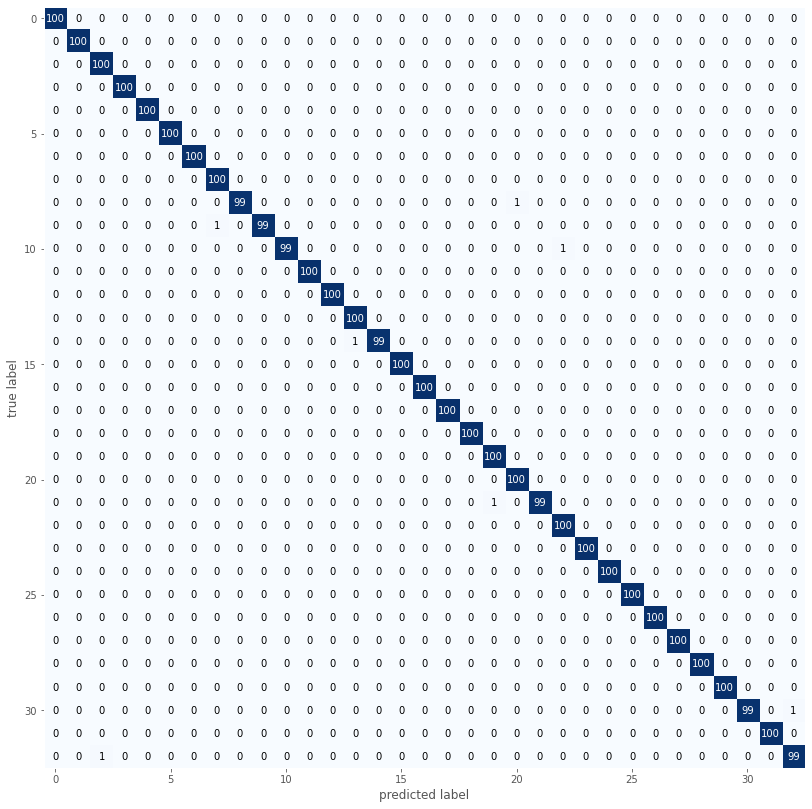

In [25]:
# ploting confision matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(x_test)
y_test_mat=np.argmax(y_test, axis=1)
mat = confusion_matrix(y_test_mat, y_pred)
plt.figure()
plot_confusion_matrix(conf_mat=mat, figsize=(14, 14))
plt.savefig("conf_mat.png")
files.download("conf_mat.png")
print("Ploting Conf_Mat..................")